In [36]:
import matplotlib.pyplot as plt

# Simple plot to test matplotlib
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Test Plot')
plt.show()


In [16]:
# Import the main function from controller.py
from controller import main

# Run the main function
main()


Your IP address is: 172.21.0.2
The connection to https://www.google.com is secure (HTTPS).
traceroute to www.google.com (142.251.221.68), 30 hops max, 60 byte packets
 1  172.21.0.1 (172.21.0.1)  0.809 ms  0.764 ms  0.744 ms
 2  * 192.168.64.1 (192.168.64.1)  0.675 ms  0.638 ms
 3  mymodem.modem (192.168.0.1)  1.154 ms  1.131 ms  1.092 ms
 4  gateway.qb10.brisbane.asp.telstra.net (58.162.26.10)  29.173 ms  29.129 ms  29.082 ms
 5  ae10.woo-ice301.brisbane.telstra.net (203.50.61.17)  21.607 ms ae10.cha-ice301.brisbane.telstra.net (203.50.61.1)  20.705 ms ae10.woo-ice301.brisbane.telstra.net (203.50.61.17)  21.444 ms
 6  bundle-ether25.cha-core30.brisbane.telstra.net (203.50.61.0)  21.397 ms bundle-ether25.woo-core30.brisbane.telstra.net (203.50.61.16)  21.313 ms  20.888 ms
 7  bundle-ether4.stl-core30.sydney.telstra.net (203.50.13.155)  31.720 ms  31.685 ms bundle-ether5.hay-core30.sydney.telstra.net (203.50.13.157)  35.539 ms
 8  bundle-ether1.ken-edge903.sydney.telstra.net (203.50.11.

In [17]:
# Run the entire controller.py script
%run controller.py


Your IP address is: 172.21.0.2
The connection to https://www.google.com is secure (HTTPS).
traceroute to www.google.com (142.251.221.68), 30 hops max, 60 byte packets
 1  172.21.0.1 (172.21.0.1)  0.489 ms  0.512 ms  0.497 ms
 2  * 192.168.64.1 (192.168.64.1)  0.451 ms  0.419 ms
 3  mymodem.modem (192.168.0.1)  0.888 ms  0.853 ms  0.875 ms
 4  gateway.qb10.brisbane.asp.telstra.net (58.162.26.10)  37.995 ms  37.960 ms  37.931 ms
 5  ae10.cha-ice301.brisbane.telstra.net (203.50.61.1)  19.760 ms ae10.woo-ice301.brisbane.telstra.net (203.50.61.17)  20.181 ms  19.699 ms
 6  bundle-ether25.woo-core30.brisbane.telstra.net (203.50.61.16)  21.219 ms bundle-ether25.cha-core30.brisbane.telstra.net (203.50.61.0)  20.430 ms  20.071 ms
 7  bundle-ether5.hay-core30.sydney.telstra.net (203.50.13.157)  35.546 ms  35.512 ms  35.483 ms
 8  bundle-ether1.chw-edge903.sydney.telstra.net (203.50.11.177)  31.119 ms  30.732 ms  30.697 ms
 9  goo2503069.lnk.telstra.net (58.163.91.194)  30.494 ms goo2503144.lnk.t

In [18]:
from model import get_ip_address, check_https, traceroute, geolocate_ip
from view import print_ip_address, print_https_check, print_traceroute_output, print_hop_info, print_invalid_latency, plot_latency

def main():
    # Check IP Address
    ip_address = get_ip_address()
    print_ip_address(ip_address)

    # Check HTTPS for a common site
    url = "https://www.google.com"
    is_secure = check_https(url)
    print_https_check(url, is_secure)

    # Perform a traceroute
    traceroute_output = traceroute("www.google.com")
    print_traceroute_output(traceroute_output)

    # Analyze traceroute output
    hops = []
    latencies = []
    for line in traceroute_output:
        if line.startswith(" "):
            parts = line.split()
            if len(parts) >= 9:
                hop = parts[1]
                latency = parts[4]
                ip = parts[3]
                try:
                    latencies.append(float(latency.replace('ms', '')))
                    hops.append(hop)
                    country, description = geolocate_ip(ip)
                    print_hop_info(hop, ip, latency, country, description)
                except ValueError:
                    print_invalid_latency(line)

    # Plot latency
    if hops and latencies:
        plot_latency(hops, latencies)

if __name__ == "__main__":
    main()


Your IP address is: 172.21.0.2
The connection to https://www.google.com is secure (HTTPS).
traceroute to www.google.com (142.251.221.68), 30 hops max, 60 byte packets
 1  172.21.0.1 (172.21.0.1)  0.648 ms  0.614 ms  0.597 ms
 2  * 192.168.64.1 (192.168.64.1)  0.544 ms  0.501 ms
 3  mymodem.modem (192.168.0.1)  1.142 ms  1.019 ms  1.051 ms
 4  gateway.qb10.brisbane.asp.telstra.net (58.162.26.10)  44.674 ms  44.643 ms  44.601 ms
 5  ae10.woo-ice301.brisbane.telstra.net (203.50.61.17)  20.033 ms  20.000 ms ae10.cha-ice301.brisbane.telstra.net (203.50.61.1)  23.688 ms
 6  bundle-ether25.woo-core30.brisbane.telstra.net (203.50.61.16)  21.846 ms  21.045 ms  21.296 ms
 7  bundle-ether4.stl-core30.sydney.telstra.net (203.50.13.155)  30.714 ms  30.682 ms  30.647 ms
 8  bundle-ether1.chw-edge903.sydney.telstra.net (203.50.11.177)  30.597 ms bundle-ether1.ken-edge903.sydney.telstra.net (203.50.11.173)  35.006 ms  34.972 ms
 9  goo2503144.lnk.telstra.net (58.163.91.202)  34.341 ms 72.14.212.22 (72

In [19]:
import socket
import requests
import subprocess
import platform
from ipwhois import IPWhois

def get_ip_address():
    hostname = socket.gethostname()
    ip_address = socket.gethostbyname(hostname)
    return ip_address

def check_https(url):
    try:
        response = requests.get(url)
        return response.url.startswith("https://")
    except requests.exceptions.RequestException:
        return False

def traceroute(host):
    os_name = platform.system()
    if os_name == "Windows":
        command = ['tracert', host]
    else:
        command = ['traceroute', host]
    
    try:
        result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        if result.returncode == 0:
            return result.stdout.decode('utf-8').splitlines()
        else:
            return []
    except Exception:
        return []

def geolocate_ip(ip):
    try:
        obj = IPWhois(ip)
        res = obj.lookup_rdap()
        return res['asn_country_code'], res['asn_description']
    except Exception:
        return "Unknown", "Unknown"


In [20]:
import matplotlib.pyplot as plt

# Use the 'Agg' backend for rendering plots in a headless environment
plt.switch_backend('Agg')

def print_ip_address(ip_address):
    print(f"Your IP address is: {ip_address}")

def print_https_check(url, is_secure):
    status = "secure (HTTPS)" if is_secure else "not secure (HTTP)"
    print(f"The connection to {url} is {status}.")

def print_traceroute_output(traceroute_output):
    for line in traceroute_output:
        print(line)

def print_hop_info(hop, ip, latency, country, description):
    print(f"Hop: {hop}, IP: {ip}, Latency: {latency}, Location: {country}, Description: {description}")

def print_invalid_latency(line):
    print(f"Skipping hop with invalid latency: {line}")

def plot_latency(hops, latencies):
    plt.figure(figsize=(10, 5))
    plt.plot(hops, latencies, marker='o')
    plt.title('Traceroute Latency')
    plt.xlabel('Hop')
    plt.ylabel('Latency (ms)')
    plt.grid(True)
    plt.savefig('latency_plot.png')  # Save the plot to a file
    plt.show()  # Ensure the plot is displayed

# Ensure interactive mode is enabled
plt.ion()


In [21]:
from model import get_ip_address, check_https

# Check IP Address
ip_address = get_ip_address()
print(f"Your IP address is: {ip_address}")

# Check HTTPS for a common site
url = "https://www.google.com"
is_secure = check_https(url)
print(f"The connection to {url} is secure (HTTPS)." if is_secure else f"The connection to {url} is not secure (HTTP).")


Your IP address is: 172.21.0.2
The connection to https://www.google.com is secure (HTTPS).


In [22]:
from model import traceroute

# Perform a traceroute
traceroute_output = traceroute("www.google.com")
for line in traceroute_output:
    print(line)


traceroute to www.google.com (142.251.221.68), 30 hops max, 60 byte packets
 1  172.21.0.1 (172.21.0.1)  0.705 ms  0.716 ms  0.701 ms
 2  * 192.168.64.1 (192.168.64.1)  0.618 ms  0.604 ms
 3  mymodem.modem (192.168.0.1)  1.112 ms  1.171 ms  1.127 ms
 4  gateway.qb10.brisbane.asp.telstra.net (58.162.26.10)  19.931 ms  19.888 ms  19.840 ms
 5  ae10.woo-ice301.brisbane.telstra.net (203.50.61.17)  20.243 ms  34.158 ms ae10.cha-ice301.brisbane.telstra.net (203.50.61.1)  20.152 ms
 6  bundle-ether25.woo-core30.brisbane.telstra.net (203.50.61.16)  20.561 ms  19.837 ms bundle-ether25.cha-core30.brisbane.telstra.net (203.50.61.0)  19.850 ms
 7  bundle-ether5.hay-core30.sydney.telstra.net (203.50.13.157)  35.533 ms  35.487 ms bundle-ether4.stl-core30.sydney.telstra.net (203.50.13.155)  30.050 ms
 8  bundle-ether1.chw-edge903.sydney.telstra.net (203.50.11.177)  30.355 ms bundle-ether1.ken-edge903.sydney.telstra.net (203.50.11.173)  34.122 ms bundle-ether1.chw-edge903.sydney.telstra.net (203.50.11

In [23]:
from model import geolocate_ip
from view import print_hop_info, print_invalid_latency

# Analyze traceroute output
hops = []
latencies = []
for line in traceroute_output:
    if line.startswith(" "):
        parts = line.split()
        if len(parts) >= 9:
            hop = parts[1]
            latency = parts[4]
            ip = parts[3]
            try:
                latencies.append(float(latency.replace('ms', '')))
                hops.append(hop)
                country, description = geolocate_ip(ip)
                print_hop_info(hop, ip, latency, country, description)
            except ValueError:
                print_invalid_latency(line)


Skipping hop with invalid latency:  1  172.21.0.1 (172.21.0.1)  0.705 ms  0.716 ms  0.701 ms
Skipping hop with invalid latency:  3  mymodem.modem (192.168.0.1)  1.112 ms  1.171 ms  1.127 ms
Skipping hop with invalid latency:  4  gateway.qb10.brisbane.asp.telstra.net (58.162.26.10)  19.931 ms  19.888 ms  19.840 ms
Skipping hop with invalid latency:  5  ae10.woo-ice301.brisbane.telstra.net (203.50.61.17)  20.243 ms  34.158 ms ae10.cha-ice301.brisbane.telstra.net (203.50.61.1)  20.152 ms
Skipping hop with invalid latency:  6  bundle-ether25.woo-core30.brisbane.telstra.net (203.50.61.16)  20.561 ms  19.837 ms bundle-ether25.cha-core30.brisbane.telstra.net (203.50.61.0)  19.850 ms
Skipping hop with invalid latency:  7  bundle-ether5.hay-core30.sydney.telstra.net (203.50.13.157)  35.533 ms  35.487 ms bundle-ether4.stl-core30.sydney.telstra.net (203.50.13.155)  30.050 ms
Skipping hop with invalid latency:  8  bundle-ether1.chw-edge903.sydney.telstra.net (203.50.11.177)  30.355 ms bundle-ether

In [24]:
from view import plot_latency

# Plot latency
if hops and latencies:
    plot_latency(hops, latencies)


In [25]:
from model import get_ip_address, check_https

# Check IP Address
ip_address = get_ip_address()
print(f"Your IP address is: {ip_address}")

# Check HTTPS for a common site
url = "https://www.google.com"
is_secure = check_https(url)
print(f"The connection to {url} is secure (HTTPS)." if is_secure else f"The connection to {url} is not secure (HTTP).")


Your IP address is: 172.21.0.2
The connection to https://www.google.com is secure (HTTPS).


In [26]:
traceroute("www.microsoft.com")

['traceroute to www.microsoft.com (23.219.209.234), 30 hops max, 60 byte packets',
 ' 1  172.21.0.1 (172.21.0.1)  0.649 ms  0.619 ms  0.636 ms',
 ' 2  192.168.64.1 (192.168.64.1)  0.622 ms  0.590 ms  0.563 ms',
 ' 3  mymodem.modem (192.168.0.1)  0.937 ms  0.904 ms  0.793 ms',
 ' 4  gateway.qb10.brisbane.asp.telstra.net (58.162.26.10)  18.937 ms  19.275 ms  19.241 ms',
 ' 5  ae161.cha-ice301.brisbane.telstra.net (203.46.69.2)  22.620 ms  25.396 ms  22.554 ms',
 ' 6  203.46.69.3 (203.46.69.3)  25.322 ms  34.169 ms  34.115 ms',
 ' 7  * * *',
 ' 8  * * *',
 ' 9  * * *',
 '10  * * *',
 '11  * * *',
 '12  * * *',
 '13  * * *',
 '14  * * *',
 '15  * * *',
 '16  * * *',
 '17  * * *',
 '18  * * *',
 '19  * * *',
 '20  * * *',
 '21  * * *',
 '22  * * *',
 '23  * * *',
 '24  * * *',
 '25  * * *',
 '26  * * *',
 '27  * * *',
 '28  * * *',
 '29  * * *',
 '30  * * *']

In [28]:
!pip install ipwhois


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [29]:
from ipwhois import IPWhois

def geolocate_ip(ip):
    try:
        obj = IPWhois(ip)
        res = obj.lookup_rdap()
        return res['asn_country_code'], res['asn_description']
    except Exception as e:
        return "Unknown", f"Exception: {e}"

ip = '8.8.8.8'  # Example IP
country, description = geolocate_ip(ip)
print(f"Country: {country}, Description: {description}")


Country: US, Description: GOOGLE, US


Your IP address is: 172.21.0.2
The connection to https://www.google.com is secure (HTTPS).
traceroute to www.google.com (142.250.66.228), 30 hops max, 60 byte packets
 1  172.21.0.1 (172.21.0.1)  0.746 ms  0.698 ms  0.676 ms
 2  192.168.64.1 (192.168.64.1)  0.658 ms  0.483 ms  0.416 ms
 3  mymodem.modem (192.168.0.1)  1.167 ms  1.136 ms  1.186 ms
 4  gateway.qb10.brisbane.asp.telstra.net (58.162.26.10)  26.467 ms  26.567 ms  26.790 ms
 5  ae10.woo-ice301.brisbane.telstra.net (203.50.61.17)  20.918 ms  20.884 ms  20.849 ms
 6  bundle-ether25.woo-core30.brisbane.telstra.net (203.50.61.16)  21.742 ms bundle-ether25.cha-core30.brisbane.telstra.net (203.50.61.0)  19.453 ms  21.431 ms
 7  bundle-ether4.stl-core30.sydney.telstra.net (203.50.13.155)  31.163 ms  31.556 ms bundle-ether5.hay-core30.sydney.telstra.net (203.50.13.157)  35.473 ms
 8  bundle-ether1.ken-edge903.sydney.telstra.net (203.50.11.173)  34.094 ms  34.254 ms bundle-ether1.chw-edge903.sydney.telstra.net (203.50.11.177)  31.009

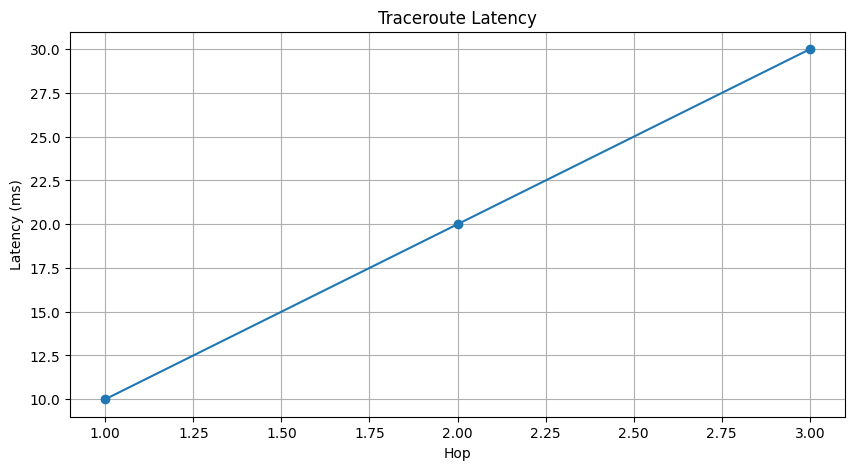

In [40]:
from model import get_ip_address, check_https, traceroute, geolocate_ip
from view import plot_latency
%matplotlib inline
# Test IP Address
ip_address = get_ip_address()
print(f"Your IP address is: {ip_address}")

# Test HTTPS Check
url = "https://www.google.com"
is_secure = check_https(url)
print(f"The connection to {url} is secure (HTTPS)." if is_secure else f"The connection to {url} is not secure (HTTP).")

# Test Traceroute
traceroute_output = traceroute("www.google.com")
for line in traceroute_output:
    print(line)

# Test Geolocation
for line in traceroute_output:
    if line.startswith(" "):
        parts = line.split()
        if len(parts) >= 9:
            ip = parts[3]
            country, description = geolocate_ip(ip)
            print(f"IP: {ip}, Country: {country}, Description: {description}")

# Test Plot Latency
hops = [1, 2, 3]
latencies = [10, 20, 30]
plot_latency(hops, latencies)


In [31]:
hops = [1, 2, 3]
latencies = [10, 20, 30]
plot_latency(hops, latencies)

In [38]:
import matplotlib.pyplot as plt

# Use the 'Agg' backend for rendering plots in a headless environment
plt.switch_backend('Agg')

def print_ip_address(ip_address):
    print(f"Your IP address is: {ip_address}")

def print_https_check(url, is_secure):
    status = "secure (HTTPS)" if is_secure else "not secure (HTTP)"
    print(f"The connection to {url} is {status}.")

def print_traceroute_output(traceroute_output):
    for line in traceroute_output:
        print(line)

def print_hop_info(hop, ip, latency, country, description):
    print(f"Hop: {hop}, IP: {ip}, Latency: {latency}, Location: {country}, Description: {description}")

def print_invalid_latency(line):
    print(f"Skipping hop with invalid latency: {line}")

def plot_latency(hops, latencies):
    plt.figure(figsize=(10, 5))
    plt.plot(hops, latencies, marker='o')
    plt.title('Traceroute Latency')
    plt.xlabel('Hop')
    plt.ylabel('Latency (ms)')
    plt.grid(True)
    plt.savefig('latency_plot.png')  # Save the plot to a file
    plt.show()  # Ensure the plot is displayed

# Ensure interactive mode is enabled
#plt.ion()
hops = [1, 2, 3]
latencies = [10, 20, 30]
plot_latency(hops, latencies)

In [35]:
import matplotlib.pyplot as plt

# Simple plot to test matplotlib
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Test Plot')
plt.show()

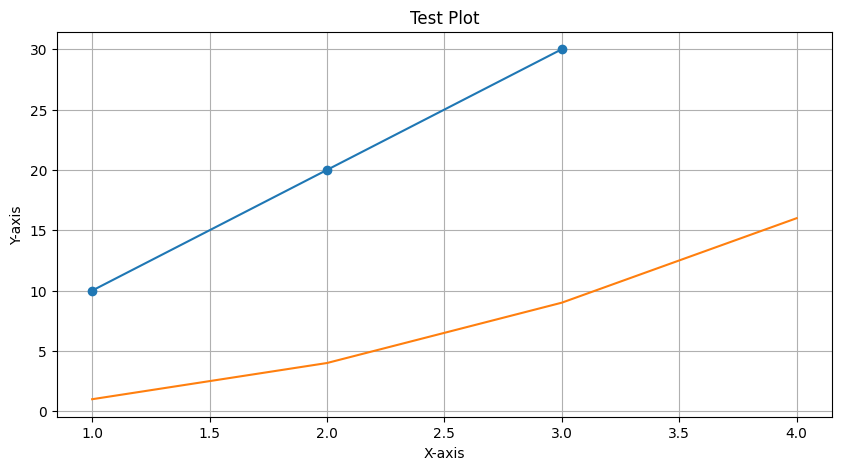

In [39]:
# Use the inline backend to display plots within the Jupyter Notebook
%matplotlib inline

import matplotlib.pyplot as plt

# Simple plot to test matplotlib
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Test Plot')
plt.show()
